# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
import json

temp = []
humidities = []
cloudiness = []
wind_speeds = []
lat = []
lng = []
country = []
date = []
city_list = []
city_data = []

# response = requests.get(query_url + "&q=" + city).json()

for i, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()

        temp.append(response["main"]['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(city)

    except:
        pass
        
city_data.append({"City": city_list,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": temp,
            "Humidity": humidities,
            "Cloudiness": cloudiness,
            "Wind Speed": wind_speeds,
            "Country": country,
            "Date": date})


In [5]:
print(city_data[0])

{'City': ['barrow', 'talaya', 'coquimbo', 'cape town', 'edson', 'ilulissat', 'mayo', 'katsuura', 'rocha', 'constitucion', 'peterhead', 'cabo san lucas', 'saskylakh', 'rikitea', 'nome', 'jamestown', 'qaanaaq', 'saint-philippe', 'innisfail', 'bethel', 'vaini', 'altamira', 'dingle', 'karpathos', 'bluff', 'lethem', 'tonj', 'gerardmer', 'alim', 'sovetskiy', 'shimoda', 'magadan', 'kirkland lake', 'severo-kurilsk', 'aykhal', 'vardo', 'upernavik', 'punta arenas', 'mount gambier', 'quetta', 'hermanus', 'mahebourg', 'dunedin', 'mataura', 'atambua', 'kapaa', 'cuajinicuilapa', 'baruun-urt', 'antofagasta', 'portland', 'atuona', 'banposh', 'hilo', 'ushuaia', 'lebu', 'mahajanga', 'salalah', 'busselton', 'esperance', 'bosobolo', 'rio grande', 'port elizabeth', 'srednekolymsk', 'kahului', 'sulangan', 'khatanga', 'nanortalik', 'sorong', 'potrerillos', 'hervey bay', 'suntar', 'labuhan', 'chuy', 'sitka', 'zhigansk', 'visby', 'indiaroba', 'georgetown', 'sungaipenuh', 'mar del plata', 'new norfolk', 'corint

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame(city_data[0])
weather_df.to_csv('weather_data.csv')
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,2.01,93,100,6.69,US,1658877943
1,talaya,61.3833,152.7500,12.11,84,100,2.40,RU,1658877944
2,coquimbo,-29.9533,-71.3436,12.85,94,20,2.57,CL,1658877672
3,cape town,-33.9258,18.4232,12.29,91,40,1.03,ZA,1658877741
4,edson,53.5835,-116.4356,26.08,34,40,2.06,CA,1658877944
...,...,...,...,...,...,...,...,...,...
572,khartoum,15.5518,32.5324,30.01,64,97,2.24,SD,1658877871
573,guanica,17.9716,-66.9080,30.03,82,44,5.00,PR,1658878113
574,veraval,20.9000,70.3667,26.97,82,91,3.89,IN,1658878113
575,montecorvino rovella,40.6918,14.9780,25.81,88,0,1.33,IT,1658878114


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
filtered_weather_df = weather_df[weather_df['Humidity'] <= 100]
filtered_weather_df

# No cities have over 100% listed for their humidity value.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,2.01,93,100,6.69,US,1658877943
1,talaya,61.3833,152.7500,12.11,84,100,2.40,RU,1658877944
2,coquimbo,-29.9533,-71.3436,12.85,94,20,2.57,CL,1658877672
3,cape town,-33.9258,18.4232,12.29,91,40,1.03,ZA,1658877741
4,edson,53.5835,-116.4356,26.08,34,40,2.06,CA,1658877944
...,...,...,...,...,...,...,...,...,...
572,khartoum,15.5518,32.5324,30.01,64,97,2.24,SD,1658877871
573,guanica,17.9716,-66.9080,30.03,82,44,5.00,PR,1658878113
574,veraval,20.9000,70.3667,26.97,82,91,3.89,IN,1658878113
575,montecorvino rovella,40.6918,14.9780,25.81,88,0,1.33,IT,1658878114


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (Celsius)')

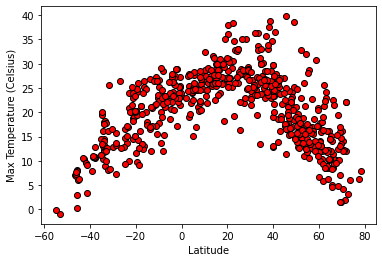

In [8]:
x_limit = 100
x_axis = weather_df['Lat']
y_axis = weather_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")

## Latitude vs. Humidity Plot

TypeError: 'str' object is not callable

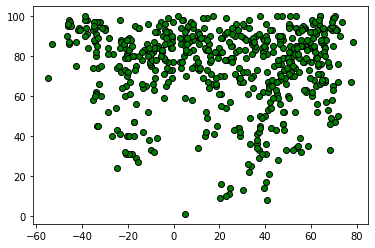

In [24]:
x_axis = weather_df['Lat']
y_axis = weather_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

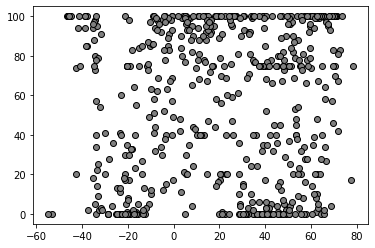

In [10]:
x_axis = weather_df['Lat']
y_axis = weather_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## Latitude vs. Wind Speed Plot

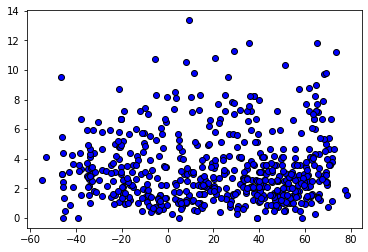

In [11]:
x_axis = weather_df['Lat']
y_axis = weather_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

## Linear Regression

In [12]:
northern_df = weather_df[weather_df['Lat'] >= 0]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,2.01,93,100,6.69,US,1658877943
1,talaya,61.3833,152.7500,12.11,84,100,2.40,RU,1658877944
4,edson,53.5835,-116.4356,26.08,34,40,2.06,CA,1658877944
5,ilulissat,69.2167,-51.1000,7.01,93,100,3.09,GL,1658877945
6,mayo,38.8876,-76.5119,26.23,83,100,2.06,US,1658877945


In [13]:
southern_df = weather_df[weather_df['Lat'] <= 0]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,coquimbo,-29.9533,-71.3436,12.85,94,20,2.57,CL,1658877672
3,cape town,-33.9258,18.4232,12.29,91,40,1.03,ZA,1658877741
8,rocha,-34.4833,-54.3333,16.21,96,98,2.16,UY,1658877946
9,constitucion,-35.3333,-72.4167,11.16,93,94,2.85,CL,1658877946
13,rikitea,-23.1203,-134.9692,24.05,72,60,4.98,PF,1658877947


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

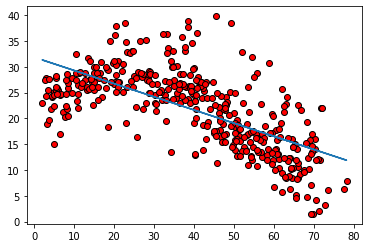

In [14]:
x_axis = northern_df['Lat']
y_axis = northern_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

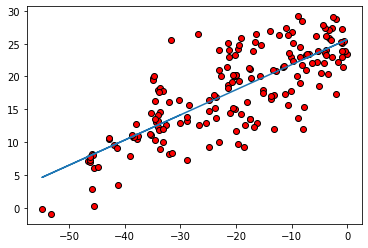

In [15]:
x_axis = southern_df['Lat']
y_axis = southern_df['Max Temp']

plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

# These linear regressions show that, in the northern hemisphere, temperatures decrease 
# as latitude increases. In the southern hemisphere, the opposite is true: increased 
# latitude correlates with increased temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

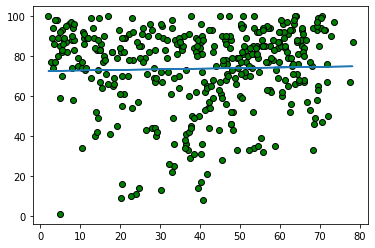

In [16]:
x_axis = northern_df['Lat']
y_axis = northern_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

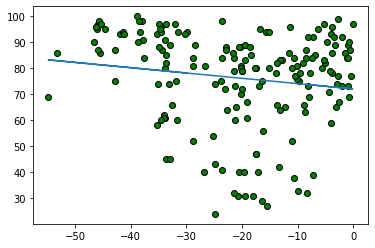

In [17]:
x_axis = southern_df['Lat']
y_axis = southern_df['Humidity']

plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

# Similar to the first pair of regressions, these two plots show humidity increasing
# with latitude in the northern hemisphere and decreasing with latitude in the southern
# hemisphere. However, here the lines are less steep, meaning that the change in humidity
# with latitude is less than the change in temperature with latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

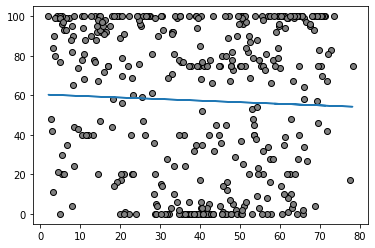

In [18]:
x_axis = northern_df['Lat']
y_axis = northern_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

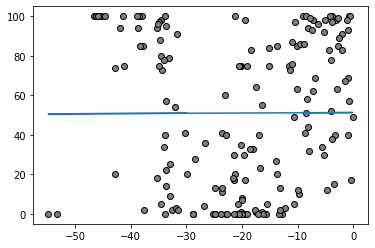

In [19]:
x_axis = southern_df['Lat']
y_axis = southern_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker='o', facecolors='gray', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

# Looking at these regressions and their corresponding plots, I can tell that
# latitude seems to have little effect on cloudiness, and that places with more
# or less cloud cover can (and do) exist anywhere on Earth.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

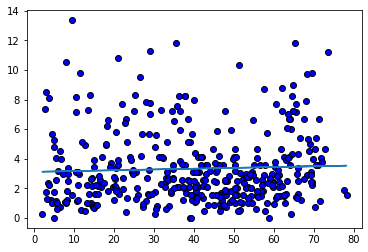

In [20]:
x_axis = northern_df['Lat']
y_axis = northern_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

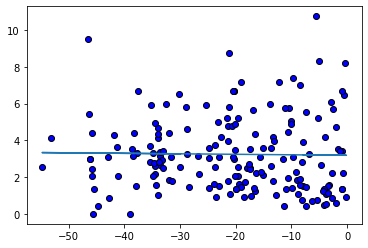

In [21]:
x_axis = southern_df['Lat']
y_axis = southern_df['Wind Speed']

plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)

# These plots also show that wind speeds vary greatly by city in both hemispheres,
# and do not correspond very closely with latitude. 